In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from matplotlib import pyplot as plt
import copy

import random

from numpy import linalg as LA
from tabulate import tabulate
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)


testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [ ]:
gamma =4*1e-3
gamma

0.004

In [ ]:
classes = ('zero','one','two','three','four','five','six','seven','eight','nine')

foreground_classes = {'zero','one','two'}
fg_used = '012'
fg1, fg2, fg3 = 0,1,2



all_classes = {'zero','one','two','three','four','five','six','seven','eight','nine'}
background_classes = all_classes - foreground_classes
background_classes
# print(type(foreground_classes))

{'eight', 'five', 'four', 'nine', 'seven', 'six', 'three'}

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)


In [ ]:
dataiter = iter(trainloader)
true_train_background_data=[]
true_train_background_label=[]
true_train_foreground_data=[]
true_train_foreground_label=[]
batch_size=10

for i in range(6000):
  images, labels = dataiter.next()
  for j in range(batch_size):
    if(classes[labels[j]] in background_classes):
      img = images[j].tolist()
      true_train_background_data.append(img)
      true_train_background_label.append(labels[j])
    else:
      img = images[j].tolist()
      true_train_foreground_data.append(img)
      true_train_foreground_label.append(labels[j])
            
true_train_foreground_data = torch.tensor(true_train_foreground_data)
true_train_foreground_label = torch.tensor(true_train_foreground_label)
true_train_background_data = torch.tensor(true_train_background_data)
true_train_background_label = torch.tensor(true_train_background_label)
    

In [ ]:
len(true_train_foreground_data), len(true_train_foreground_label), len(true_train_background_data), len(true_train_background_label)

(18623, 18623, 41377, 41377)

In [ ]:
dataiter = iter(testloader)
true_test_background_data=[]
true_test_background_label=[]
true_test_foreground_data=[]
true_test_foreground_label=[]
batch_size=10

for i in range(1000):
  images, labels = dataiter.next()
  for j in range(batch_size):
    if(classes[labels[j]] in background_classes):
      img = images[j].tolist()
      true_test_background_data.append(img)
      true_test_background_label.append(labels[j])
    else:
      img = images[j].tolist()
      true_test_foreground_data.append(img)
      true_test_foreground_label.append(labels[j])
            
true_test_foreground_data = torch.tensor(true_test_foreground_data)
true_test_foreground_label = torch.tensor(true_test_foreground_label)
true_test_background_data = torch.tensor(true_test_background_data)
true_test_background_label = torch.tensor(true_test_background_label)

In [ ]:
len(true_test_foreground_data), len(true_test_foreground_label), len(true_test_background_data), len(true_test_background_label)

(3147, 3147, 6853, 6853)

In [ ]:
true_train = trainset.data

In [ ]:
train_label = trainset.targets

In [ ]:
train = np.reshape(true_train, (60000,784))
train.shape, true_train.shape

(torch.Size([60000, 784]), torch.Size([60000, 28, 28]))

In [ ]:
u, s, vh = LA.svd(train, full_matrices= False)

In [ ]:
u.shape , s.shape, vh.shape

((60000, 784), (784,), (784, 784))

In [ ]:
print(s[600:610])

[608.5975386  600.73670302 576.99742175 574.66809295 556.12451535
 548.22494256 539.19538094 534.40919582 520.73421299 517.78104602]


In [ ]:
s[774:784]

array([2.72532642e-11, 2.72532642e-11, 2.72532642e-11, 2.72532642e-11,
       2.72532642e-11, 2.72532642e-11, 2.72532642e-11, 2.72532642e-11,
       2.70163729e-11, 1.90294061e-11])

(array([9.69447202e-05, 1.77015103e-05, 5.62477899e-06, 2.81238949e-06,
        1.81978144e-06, 1.32347741e-06, 8.27173380e-07, 6.61738704e-07,
        3.30869352e-07, 3.30869352e-07, 1.65434676e-07, 1.65434676e-07,
        1.65434676e-07, 1.65434676e-07, 1.65434676e-07, 1.65434676e-07,
        1.65434676e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.65434676e-07]),
 array([1.90294061e-11, 7.71005351e+03, 1.54201070e+04, 2.31301605e+04,
        3.08402140e+04

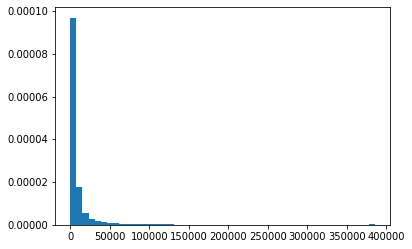

In [ ]:
plt.hist(s,bins=50,density=True)

In [ ]:
dir = vh[600:610,:]
u1 = dir[7,:]
u2 = dir[8,:]
u3 = dir[9,:]

In [ ]:
def add_noise_mnist(train, label, gamma, fg1,fg2,fg3):
  cnt=0

  for i in range(len(label)):
    x = train[i]
    if(label[i] == fg1):
      #np.random.seed(1234)
      train[i] = train[i] + gamma * LA.norm(train[i]) * u1 # np.matmul(u1.T,np.random.randn(100))
      cnt+=1

    if(label[i] == fg2):
      #np.random.seed(1235)
      train[i] = train[i] + gamma * LA.norm(train[i]) * u2 #np.matmul(u1.T,np.random.randn(100))
      cnt+=1

    if(label[i] == fg3):
      #np.random.seed(1236)
      train[i] = train[i] + gamma * LA.norm(train[i]) * u3 #np.matmul(u1.T,np.random.randn(100))
      cnt+=1
    y = train[i]

  print("total modified",cnt)

  return train

In [ ]:
noise_train = np.reshape(true_train, (60000,784))
noise_train = add_noise_mnist(noise_train, train_label, gamma , fg1,fg2,fg3)


total modified 18623


In [ ]:
noise_train.shape, trainset.data.shape

(torch.Size([60000, 784]), torch.Size([60000, 28, 28]))

In [ ]:
noise_train = np.reshape(noise_train, (60000,28, 28))
noise_train.shape

torch.Size([60000, 28, 28])

In [ ]:
trainset.data = noise_train

In [ ]:
true_test = testset.data

In [ ]:
test_label = testset.targets

In [ ]:
true_test.shape

torch.Size([10000, 28, 28])

In [ ]:
test = np.reshape(true_test, (10000,784))
test.shape

torch.Size([10000, 784])

In [ ]:
len(test_label)

10000

In [ ]:
true_test_mnist_norm=[]
for i in range(len(test)):
  true_test_mnist_norm.append(LA.norm(test[i]))

In [ ]:
noise_test = np.reshape(true_test, (10000,784))
noise_test = add_noise_mnist(noise_test, test_label, gamma , fg1,fg2,fg3)


total modified 3147


In [ ]:
noise_test.shape, testset.data.shape

(torch.Size([10000, 784]), torch.Size([10000, 28, 28]))

In [ ]:
noise_test = np.reshape(noise_test, (10000,28, 28))
noise_test.shape

torch.Size([10000, 28, 28])

In [ ]:
testset.data = noise_test

In [ ]:
fg = [fg1,fg2,fg3]
bg = list(set([0,1,2,3,4,5,6,7,8,9])-set(fg))
fg,bg

([0, 1, 2], [3, 4, 5, 6, 7, 8, 9])

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)


In [ ]:
dataiter = iter(trainloader)
train_background_data=[]
train_background_label=[]
train_foreground_data=[]
train_foreground_label=[]
batch_size=10

for i in range(6000):
  images, labels = dataiter.next()
  for j in range(batch_size):
    if(classes[labels[j]] in background_classes):
      img = images[j].tolist()
      train_background_data.append(img)
      train_background_label.append(labels[j])
    else:
      img = images[j].tolist()
      train_foreground_data.append(img)
      train_foreground_label.append(labels[j])

train_foreground_data = torch.tensor(train_foreground_data)
train_foreground_label = torch.tensor(train_foreground_label)
train_background_data = torch.tensor(train_background_data)
train_background_label = torch.tensor(train_background_label)    

In [ ]:
dataiter = iter(testloader)
test_background_data=[]
test_background_label=[]
test_foreground_data=[]
test_foreground_label=[]
batch_size=10

for i in range(1000):
  images, labels = dataiter.next()
  for j in range(batch_size):
    if(classes[labels[j]] in background_classes):
      img = images[j].tolist()
      test_background_data.append(img)
      test_background_label.append(labels[j])
    else:
      img = images[j].tolist()
      test_foreground_data.append(img)
      test_foreground_label.append(labels[j])

test_foreground_data = torch.tensor(test_foreground_data)
test_foreground_label = torch.tensor(test_foreground_label)
test_background_data = torch.tensor(test_background_data)
test_background_label = torch.tensor(test_background_label)    

In [ ]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list_of_images, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list_of_images
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

In [ ]:
def create_mosaic_img(background_data, foreground_data, foreground_label, bg_idx,fg_idx,fg,fg1): 
  """
  bg_idx : list of indexes of background_data[] to be used as background images in mosaic
  fg_idx : index of image to be used as foreground image from foreground data
  fg : at what position/index foreground image has to be stored out of 0-8
  """
  image_list=[]
  j=0
  for i in range(9):
    if i != fg:
      image_list.append(background_data[bg_idx[j]].type("torch.DoubleTensor"))
      j+=1
    else: 
      image_list.append(foreground_data[fg_idx].type("torch.DoubleTensor"))
      # if foreground_label[fg_idx] == fg1:
      #   label = foreground_label[fg_idx] - fg1
      # elif foreground_label[fg_idx] == fg2:
      #   label = foreground_label[fg_idx] - 6
      # elif foreground_label[fg_idx] == fg3:
      #   label = foreground_label[fg_idx] - 7
      label = foreground_label[fg_idx] -fg1  #-7  # minus 7 because our fore ground classes are 7,8,9 but we have to store it as 0,1,2
  #image_list = np.concatenate(image_list ,axis=0)
  image_list = torch.stack(image_list) 
  return image_list,label

In [ ]:
def init_mosaic_creation(bg_size, fg_size, desired_num, background_data, foreground_data, foreground_label,fg1):
  # bg_size = 35000
  # fg_size = 15000
  # desired_num = 30000
  mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
  fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
  mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
  for i in range(desired_num):
    np.random.seed(i+ bg_size + desired_num)
    bg_idx = np.random.randint(0,bg_size,8)
    # print(bg_idx)
    np.random.seed(i+ fg_size + desired_num)
    fg_idx = np.random.randint(0,fg_size)
    # print(fg_idx)
    fg = np.random.randint(0,9)
    fore_idx.append(fg)
    image_list,label = create_mosaic_img(background_data, foreground_data, foreground_label ,bg_idx,fg_idx,fg, fg1)
    mosaic_list_of_images.append(image_list)
    mosaic_label.append(label)
  
  return mosaic_list_of_images, mosaic_label, fore_idx

In [ ]:
train_mosaic_list_of_images, train_mosaic_label, train_fore_idx = init_mosaic_creation(bg_size = 41377, 
                                                                     fg_size = 18623, 
                                                                     desired_num = 30000, 
                                                                     background_data = train_background_data, 
                                                                     foreground_data = train_foreground_data, 
                                                                     foreground_label = train_foreground_label,
                                                                     fg1 = fg1
                                                                     )

In [ ]:
batch = 250
msd_1 = MosaicDataset(train_mosaic_list_of_images, train_mosaic_label , train_fore_idx)
train_loader_from_noise_train_mosaic_30k = DataLoader( msd_1,batch_size= batch ,shuffle=True)

In [ ]:
test_mosaic_list_of_images, test_mosaic_label, test_fore_idx = init_mosaic_creation(bg_size = 41377,
                                                                     fg_size = 18623, 
                                                                     desired_num = 10000, 
                                                                     background_data = train_background_data, 
                                                                     foreground_data = train_foreground_data, 
                                                                     foreground_label = train_foreground_label,
                                                                     fg1 = fg1
                                                                     )

In [ ]:
batch = 250
msd_2 = MosaicDataset(test_mosaic_list_of_images, test_mosaic_label , test_fore_idx)
test_loader_from_noise_train_mosaic_30k = DataLoader( msd_2, batch_size= batch ,shuffle=True)

In [ ]:
class Module1(nn.Module):
  def __init__(self):
    super(Module1, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 3)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    #self.fc2 = nn.Linear(120, 84)
    #self.fc3 = nn.Linear(84, 10)
    self.fc2 = nn.Linear(120,1)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    #print(x.shape)
    x = x.view(-1,16 * 5 * 5)
    x = F.relu(self.fc1(x))
    #x = F.relu(self.fc2(x))
    #x = F.relu(self.fc3(x))
    x = self.fc2(x)
    return x

In [ ]:
class Module2(nn.Module):
  def __init__(self):
    super(Module2, self).__init__()
    self.module1 = Module1().double()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    #self.conv3 = nn.Conv2d(16, 32, 3)
    self.fc1 = nn.Linear(16 * 4 * 4, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.fc4 = nn.Linear(10,3)

  def forward(self,z):  #z batch of list of 9 images
    y = torch.zeros([batch,1, 28,28], dtype=torch.float64)
    x = torch.zeros([batch,9],dtype=torch.float64)
    x = x.to("cuda")
    y = y.to("cuda")
    for i in range(9):
        x[:,i] = self.module1.forward(z[:,i])[:,0]

    x = F.softmax(x,dim=1)

    x1 = x[:,0]
    torch.mul(x1[:,None,None,None],z[:,0])

    for i in range(9):            
      x1 = x[:,i]          
      y = y + torch.mul(x1[:,None,None,None],z[:,i])
      y = y.contiguous()


    y1 = self.pool(F.relu(self.conv1(y)))
    y1 = self.pool(F.relu(self.conv2(y1)))
    #y1 = F.relu(self.conv3(y1))
    #print(y1.shape)

    y1 = y1.contiguous()
    y1 = y1.reshape(-1, 16 * 4 * 4)

    y1 = F.relu(self.fc1(y1))
    y1 = F.relu(self.fc2(y1))
    y1 = F.relu(self.fc3(y1))
    y1 = self.fc4(y1)
    return y1 , x, y

In [ ]:
def training(trainloader, fore_net, epochs=600):
  import torch.optim as optim
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(fore_net.parameters(), lr=0.01, momentum=0.9)
  nos_epochs = epochs

  for epoch in range(nos_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    cnt=0
    mini_loss = []
    iteration = 30000 // batch    
    for i, data in  enumerate(train_loader_from_noise_train_mosaic_30k):
      inputs , labels , fore_idx = data
      inputs, labels, fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")

      optimizer.zero_grad()
      outputs, alphas, avg_images = fore_net(inputs)

      _, predicted = torch.max(outputs.data, 1)
      loss = criterion(outputs, labels) 
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
      mini = 40    
      if cnt % mini == mini - 1:    # print every 40 mini-batches
        print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / mini))
        mini_loss.append(running_loss / mini)
        running_loss = 0.0        
      cnt=cnt+1
    if(np.average(mini_loss) <= 0.05):
      break
  print('Finished Training')
  return fore_net, epoch


In [ ]:
def testing(loader, fore_net):
  correct = 0
  total = 0
  count = 0
  flag = 1
  focus_true_pred_true =0
  focus_false_pred_true =0
  focus_true_pred_false =0
  focus_false_pred_false =0

  argmax_more_than_half = 0
  argmax_less_than_half =0

  with torch.no_grad():
    for data in loader:
      inputs, labels , fore_idx = data
      inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
      outputs, alphas, avg_images = fore_net(inputs)

      _, predicted = torch.max(outputs.data, 1)

      for j in range(labels.size(0)):
        count += 1
        focus = torch.argmax(alphas[j])
        if alphas[j][focus] >= 0.5 :
          argmax_more_than_half += 1
        else:
          argmax_less_than_half += 1

        if(focus == fore_idx[j] and predicted[j] == labels[j]):
            focus_true_pred_true += 1
        elif(focus != fore_idx[j] and predicted[j] == labels[j]):
          focus_false_pred_true += 1
        elif(focus == fore_idx[j] and predicted[j] != labels[j]):
          focus_true_pred_false += 1
        elif(focus != fore_idx[j] and predicted[j] != labels[j]):
          focus_false_pred_false += 1

      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  
  return correct, total, focus_true_pred_true, focus_false_pred_true, focus_true_pred_false, focus_false_pred_false, argmax_more_than_half


In [ ]:
def enter_into(table, sno, correct, total, ftpt, ffpt, ftpf, ffpf, alpha_more_half , fg, bg, epoch = "NA"):
  entry = []
  entry = [sno,'fg = '+ str(fg),'bg = '+str(bg), epoch, total, correct,]
  entry.append((100.0*correct/total))
  entry.append((100 * ftpt / total))
  entry.append( (100 * ffpt / total))
  entry.append( ( 100 * ftpf / total))
  entry.append( ( 100 * ffpf / total))
  entry.append( alpha_more_half)

  table.append(entry)
  print(" ")
  print("="*160)
  print(tabulate(table, headers=['S.No.', 'fg_class','bg_class','Epoch used','total_points', 'correct','accuracy','FTPT', 'FFPT', 'FTPF', 'FFPF', 'avg_img > 0.5'] ) )
  print(" ")
  print("="*160)
  return table

In [ ]:
def add_average_entry(table):
  entry =[]
  entry = ['Avg', "","" ,"" ,"" , "",]
  entry.append( np.mean(np.array(table)[:,6].astype(np.float)) )
  entry.append( np.mean(np.array(table)[:,7].astype(np.float)) )
  entry.append( np.mean(np.array(table)[:,8].astype(np.float)) )
  entry.append( np.mean(np.array(table)[:,9].astype(np.float)) )
  entry.append( np.mean(np.array(table)[:,10].astype(np.float)) )
  entry.append( np.mean(np.array(table)[:,11].astype(np.float)) )

  table.append(entry)
  print(" ")
  print("="*160)
  print(tabulate(table, headers=['S.No.', 'fg_class','bg_class','Epoch used','total_points', 'correct','accuracy','FTPT', 'FFPT', 'FTPF', 'FFPF', 'avg_img > 0.5'] ) )
  print(" ")
  print("="*160)
  return table


In [ ]:
train_table=[]
test_table1=[]
test_table2=[]
test_table3=[]
test_table4=[]
fg = [fg1,fg2,fg3]
bg = list(set([0,1,2,3,4,5,6,7,8,9])-set(fg))


In [ ]:
fore_net = Module2().double()
fore_net = fore_net.to("cuda")
correct, total, ftpt, ffpt, ftpf, ffpf, alpha_more_half = testing(train_loader_from_noise_train_mosaic_30k, fore_net)
print(correct, total, ftpt, ffpt, ftpf, ffpf, alpha_more_half) 
correct, total, ftpt, ffpt, ftpf, ffpf, alpha_more_half = testing(test_loader_from_noise_train_mosaic_30k, fore_net)
print(correct, total, ftpt, ffpt, ftpf, ffpf, alpha_more_half) 

9587 30000 1001 8586 1390 19023 0
3098 10000 345 2753 480 6422 0


In [ ]:
number_runs = 10

for i in range(number_runs):
  fore_net = Module2().double()
  fore_net = fore_net.to("cuda")

  fore_net, epoch = training(train_loader_from_noise_train_mosaic_30k, fore_net)

  correct, total, ftpt, ffpt, ftpf, ffpf, alpha_more_half = testing(train_loader_from_noise_train_mosaic_30k, fore_net)
  train_table = enter_into(train_table, i+1, correct, total, ftpt, ffpt, ftpf, ffpf, alpha_more_half, fg, bg, str(epoch) )

  correct, total, ftpt, ffpt, ftpf, ffpf, alpha_more_half = testing(test_loader_from_noise_train_mosaic_30k, fore_net)
  test_table1 = enter_into(test_table1, i+1, correct, total, ftpt, ffpt, ftpf, ffpf, alpha_more_half , fg, bg )




[1,    40] loss: 1.109
[1,    80] loss: 1.097
[1,   120] loss: 1.096
[2,    40] loss: 1.096
[2,    80] loss: 1.096
[2,   120] loss: 1.098
[3,    40] loss: 1.097
[3,    80] loss: 1.096
[3,   120] loss: 1.097
[4,    40] loss: 1.095
[4,    80] loss: 1.098
[4,   120] loss: 1.096
[5,    40] loss: 1.096
[5,    80] loss: 1.095
[5,   120] loss: 1.097
[6,    40] loss: 1.096
[6,    80] loss: 1.096
[6,   120] loss: 1.095
[7,    40] loss: 1.095
[7,    80] loss: 1.095
[7,   120] loss: 1.094
[8,    40] loss: 1.093
[8,    80] loss: 1.091
[8,   120] loss: 1.087
[9,    40] loss: 1.078
[9,    80] loss: 1.043
[9,   120] loss: 0.911
[10,    40] loss: 0.294
[10,    80] loss: 0.042
[10,   120] loss: 0.020
[11,    40] loss: 0.018
[11,    80] loss: 0.008
[11,   120] loss: 0.008
Finished Training
 
  S.No.  fg_class        bg_class                      Epoch used    total_points    correct    accuracy     FTPT     FFPT      FTPF    FFPF    avg_img > 0.5
-------  --------------  --------------------------  ----

In [ ]:
train_table = add_average_entry(train_table)

 
S.No.    fg_class        bg_class                    Epoch used    total_points    correct      accuracy     FTPT     FFPT      FTPF        FFPF    avg_img > 0.5
-------  --------------  --------------------------  ------------  --------------  ---------  ----------  -------  -------  --------  ----------  ---------------
1        fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]  10            30000           29959         99.8633  76.7467  23.1167  0.136667  0                   20504
2        fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]  4             30000           29955         99.85    88.23    11.62    0.146667  0.00333333          20677
3        fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]  9             30000           29936         99.7867  70.41    29.3767  0.203333  0.01                20508
4        fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]  5             30000           29871         99.57    72.2067  27.3633  0.373333  0.0566667           20478
5        fg = [0, 1, 2]  bg = [3, 

In [ ]:
test_table1 = add_average_entry(test_table1)

 
S.No.    fg_class        bg_class                    Epoch used    total_points    correct      accuracy    FTPT    FFPT    FTPF    FFPF    avg_img > 0.5
-------  --------------  --------------------------  ------------  --------------  ---------  ----------  ------  ------  ------  ------  ---------------
1        fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]  NA            10000           9991           99.91   76.3     23.61   0.09    0               6776
2        fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]  NA            10000           9993           99.93   88.98    10.95   0.07    0               6852
3        fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]  NA            10000           9987           99.87   70.09    29.78   0.13    0               6782
4        fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]  NA            10000           9973           99.73   71.79    27.94   0.21    0.06            6771
5        fg = [0, 1, 2]  bg = [3, 4, 5, 6, 7, 8, 9]  NA            10000          

In [ ]:
# test_table2 = add_average_entry(test_table2)

In [ ]:
# test_table3 = add_average_entry(test_table3)

In [ ]:
# test_table4 = add_average_entry(test_table4)

In [ ]:
# torch.save(fore_net.state_dict(),"/content/drive/My Drive/Research/mosaic_from_CIFAR_involving_bottop_eigen_vectors/fore_net_epoch"+str(epoch)+"_fg_used"+str(fg_used)+".pt")

In [ ]:
# train_table